## 导入库

In [1]:
from Bio import SeqIO
from Bio.SeqUtils.ProtParam import ProteinAnalysis as PA
from modlamp.descriptors import PeptideDescriptor, GlobalDescriptor
from sklearn.model_selection import train_test_split
import pandas as pd
import os, re, math, platform
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import linalg as la
import os
import random
import warnings
warnings.filterwarnings('ignore')
from fea_extract import read_fasta,insert_AAC
import random
seed = 10

## 定义函数

In [2]:
#定义函数
def del_data(seqname):
    seqname = seqname.to_numpy()
    newseq = []
    j = seqname.shape[0]
    for i in range(j):
        if 6<=len(seqname[i][1])<=100:
            newseq.append(seqname[i])
    newseq = np.array(newseq)
    print('序列去除小于6序列后的维度：',newseq.shape)
    newseq = pd.DataFrame(data = newseq,columns=["Id", "Sequence"])
    return newseq

#AAC
def AAC(seq_df):
    # Compute AAC for peptide in specific A.A
    def get_aac(seq, aa):
        return seq.count(aa) / len(seq) * 100

    # processing data_frame
    data_size = seq_df.size
    for ll in _AALetter:
        seq_df['{}'.format(ll)] = list(map(get_aac, seq_df['Sequence'], [ll] * data_size))
    return seq_df
def get_aac(seq, aa):
        return seq.count(aa) / len(seq) * 100

_AALetter = ['A', 'C', 'D', 'E', 'F', 'G', 'H',
             'I', 'K', 'L', 'M', 'N', 'P', 'Q',
             'R', 'S', 'T', 'V', 'W', 'Y']
#绘制分布图
def plot_aac(seq1,seq2):
    seq1 = del_data(seq1)
    seq2 = del_data(seq2)
    seq1aac = AAC(seq1)
    seq2aac = AAC(seq2)
    feature = seq1.columns[2:]
    seq1aac = seq1aac[feature]
    seq2aac = seq2aac[feature]
    seq1AAC = seq1aac.mean()/100
    seq2AAC = seq2aac.mean()/100
    all_seq = pd.concat([seq1AAC,seq2AAC],axis=1)
    all_seq.columns = ['AVP','AntiCoV']
    all_seq.plot.bar(figsize=(15,7),fontsize=15,rot=45,grid = False,width = 0.8)
    plt.xlabel("Amino acid composition", fontsize='x-large')
    plt.ylabel("Frequency", fontsize='x-large')

def plot_aac_pie(seq1,seq2):
    seq1 = del_data(seq1)
    seq2 = del_data(seq2)
    seq1aac = AAC(seq1)
    seq2aac = AAC(seq2)
    feature = seq1.columns[2:]
    seq1aac = seq1aac[feature]
    seq2aac = seq2aac[feature]
    seq1AAC = seq1aac.mean()/100
    seq2AAC = seq2aac.mean()/100
    all_seq = pd.concat([seq1AAC,seq2AAC],axis=1)
    all_seq.columns = ['AVP','AntiCoV']
    all_seq.plot(kind='pie',autopct='%.1f%%',startangle = 180,subplots=True,wedgeprops = {'linewidth': 1.5, 'edgecolor':'green'}, # 设置饼图内外边界的属性值
           textprops = {'fontsize':10, 'color':'black'})
#     plt.xlabel("Amino acid composition", fontsize='x-large')
#     plt.ylabel("Frequency", fontsize='x-large')

#N端C端
def seqN5C5(SEQ):
    encodeN5 = []
    encodeC5 = []
    seq = SEQ['Sequence']
    for fastas in seq:
        fastas_N5 = '%s' % fastas[:5]
        fastas_C5 = '%s' % fastas[-5:]
        encodeN5.append(fastas_N5)
        encodeC5.append(fastas_C5)
    encodingN5 = pd.DataFrame(encodeN5,columns=['Sequence'])
    SEQN5 = pd.concat([SEQ.iloc[:,0],encodingN5],axis=1)
    encodingC5 = pd.DataFrame(encodeC5,columns=['Sequence'])
    SEQC5 = pd.concat([SEQ.iloc[:,0],encodingC5],axis=1)
    return SEQN5,SEQC5
def plot_N5C5(seq1,seq2):
    seq1aac = AAC(seq1)
    seq2aac = AAC(seq2)
    feature = seq1.columns[2:]
    seq1aac = seq1aac[feature]
    seq2aac = seq2aac[feature]
    seq1AAC = seq1aac.mean()/100
    seq2AAC = seq2aac.mean()/100
    all_seq = pd.concat([seq1AAC,seq2AAC],axis=1)
    all_seq.columns = ['AVP','AntiCoV']
    all_seq.plot.bar(figsize=(15,7),fontsize=15,rot=45,grid = False,width = 0.8)
    plt.xlabel("Amino acid composition", fontsize='x-large')
    plt.ylabel("Frequency", fontsize='x-large')

## 画出每个碱基分布

### 全部序列碱基分布图

序列去除小于6序列后的维度： (1984, 2)
序列去除小于6序列后的维度： (157, 2)


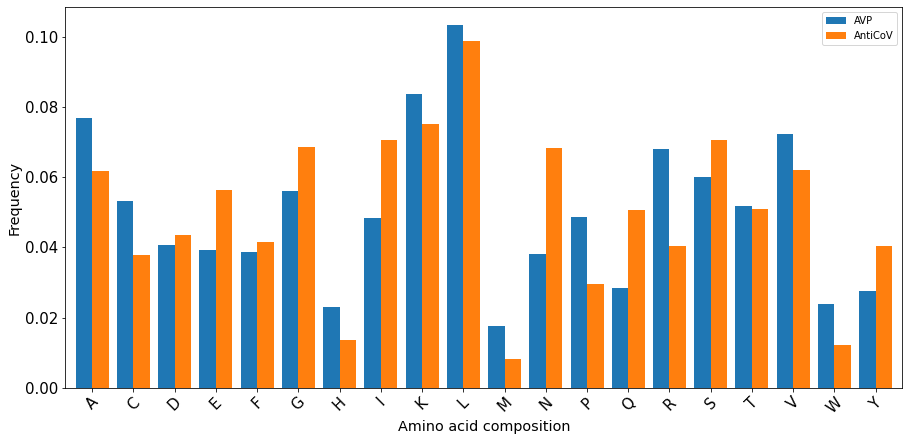

In [3]:
Seq_AVP = read_fasta('data/Anti-Virus.faa')
Seq_AntiCoV = read_fasta('data/ANTI-COV.csv')
plot_aac(Seq_AVP,Seq_AntiCoV)


### N5C5碱基分布图

In [19]:
avpn5,avpc5 = seqN5C5(Seq_AVP)
antin5,antic5 = seqN5C5(Seq_AntiCoV)

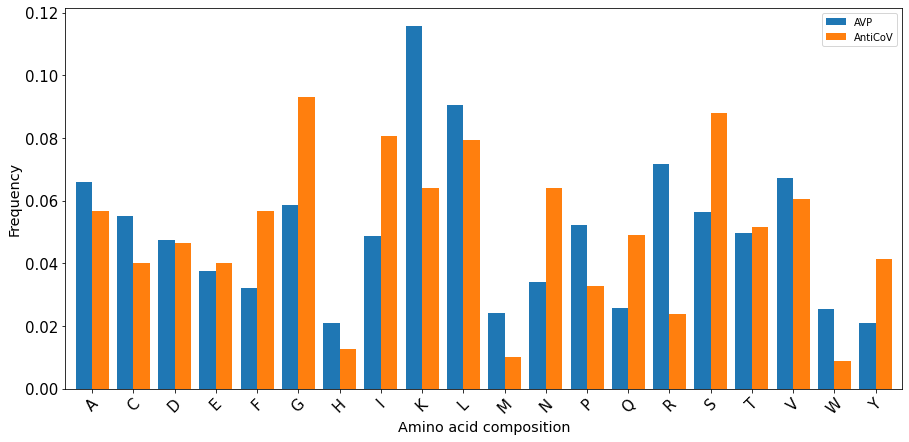

In [20]:
plot_N5C5(avpn5,antin5)

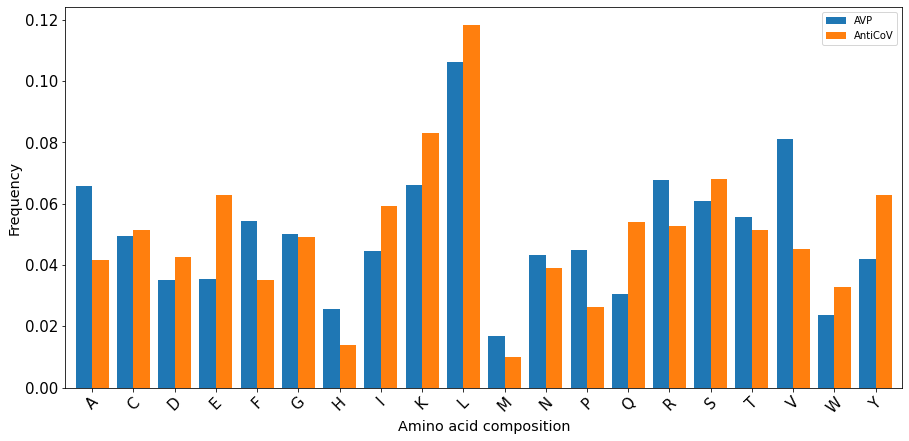

In [21]:
plot_N5C5(avpc5,antic5)

## 长度分布

In [22]:
Seq_AntiCoV1 = del_data(Seq_AntiCoV)
Seq_AVP1 = del_data(Seq_AVP)
seq_sets = {
    'Anti_CoV': Seq_AntiCoV1,
    'AVP':Seq_AVP1
#     "ACP240": read_fasta("acp240.txt"),
#     'ACP740': read_fasta('acp740.txt')
}

序列去除小于6序列后的维度： (157, 2)
序列去除小于6序列后的维度： (1984, 2)


6
96
157
6
100
1984


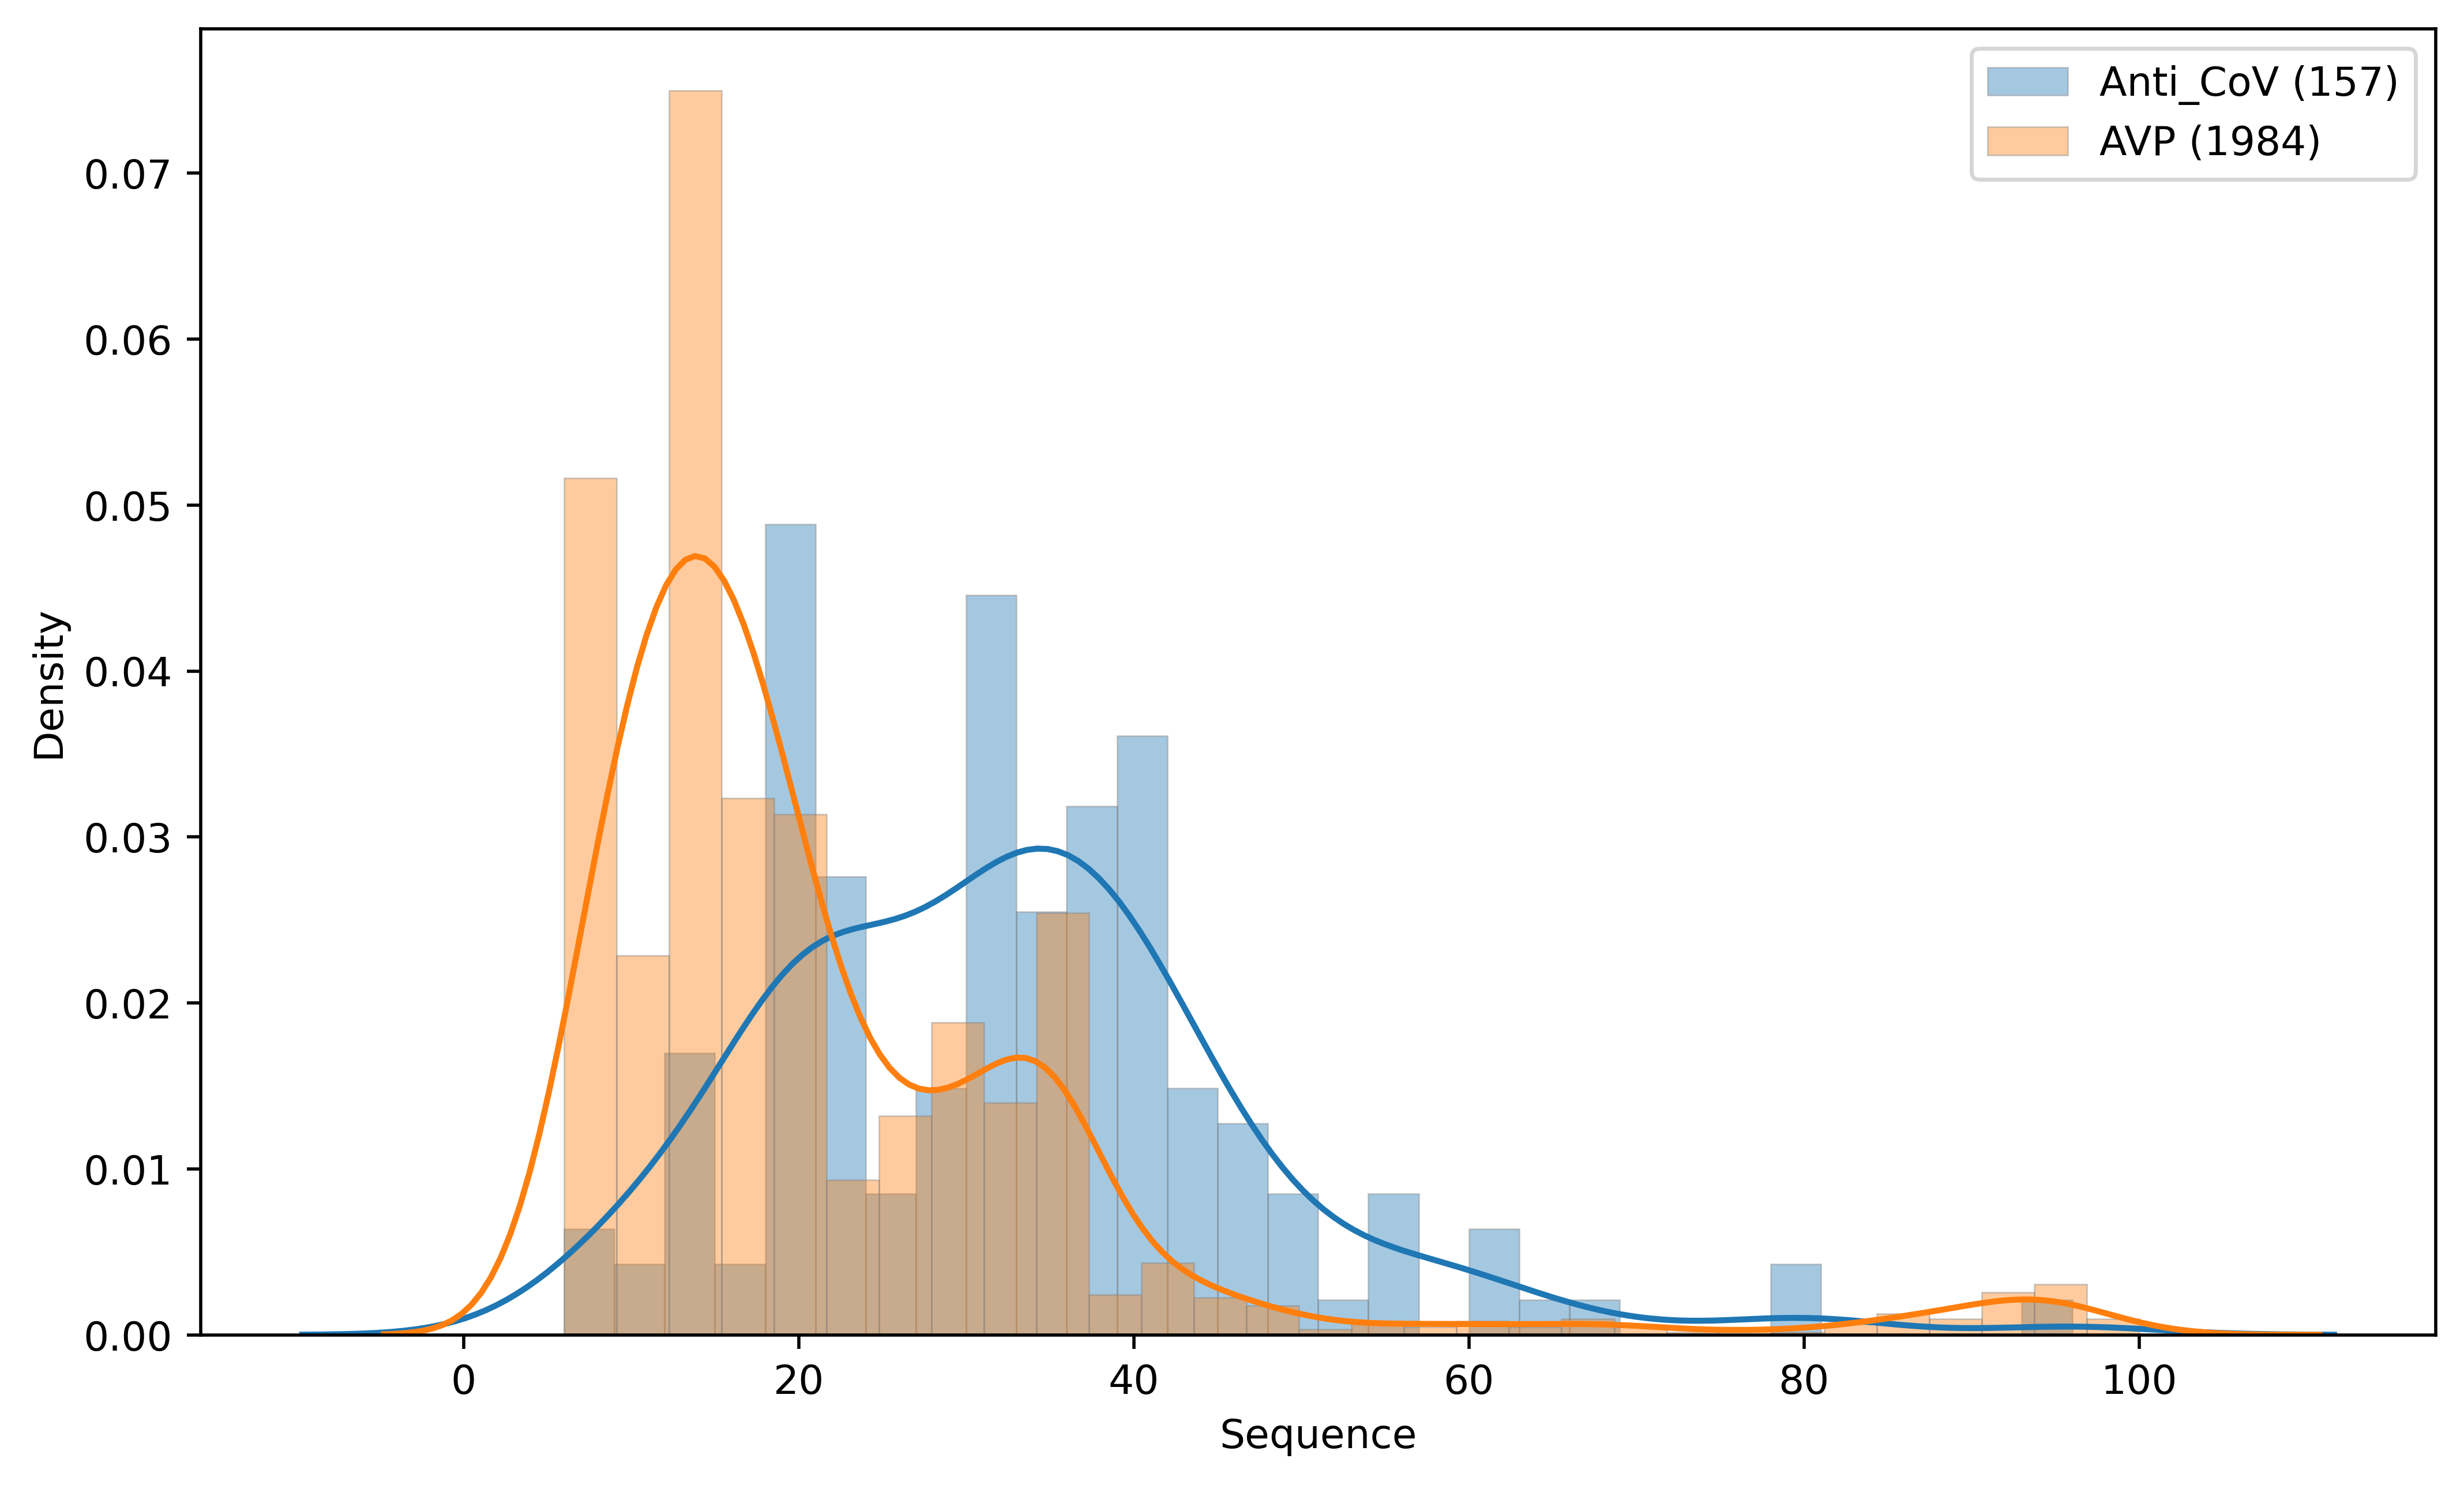

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6), dpi=500)
for seq_name, seq in seq_sets.items():
    seq_len = seq['Sequence'].str.len()
    sns.distplot(seq_len, bins=30, label="{:s} ({:d})".format(seq_name, len(seq)), rug=False, kde=True,
                hist_kws=dict(edgecolor="#808080", linewidth=.4))
    print(min(seq_len))
    print(max(seq_len))
    print(len(seq))
plt.legend()
# sns .distplot(Seq_AntiCoV1['Sequence'].str.len(),bins = 40,label = 'Anti_CoV(124)',kde = True,color = 'g')
# sns .distplot(Seq_AVP1['Sequence'].str.len(),bins = 40,label = 'AVP(1871)',kde = True,color = 'b')
# plt.xlabel("Sequence Length", fontsize='x-large')
# plt.ylabel("Frequency", fontsize='x-large')
# lgd = plt.legend(fontsize='x-large')
# plt.savefig("results/序列长度分布.jpg")